####  Simulation to compare the kNN and the Bayes error rates 
- By generating normally distribution data set
- Bayes Desicion Rule Implemented from the scratch

In [1]:
# Generating First DataSet

set.seed(15)
rvar1 = rnorm(600,mean = 0,sd = 1)
data1 = matrix(rvar1,2,300)
sigma1 = matrix(c(149, -47, -47, 209),2,2)
data_new1 = t(data1)%*%sigma1
mu1 = c(680,700)
datared = data_new1 + mu1

In [2]:
# Generating Second DataSet

rvar2 = rnorm(600,mean = 0, sd = 1)
data2 = matrix(c(rvar2),2,300)
rownames(data2) = c("X1","X2")
sigma2 = matrix(c(200, 15, 15, 250),2,2)
data_new2 = t(data2)%*%sigma2 
mu2 = c(10,550)
datablue = data_new2+ mu2

In [3]:
simdata <- data.frame(X1 = datared[,1], X2 = datared[,2], Y = rep('red', 300))
simdata <- rbind(simdata, data.frame(X1 = datablue[,1], X2 = datablue[,2] , Y = rep('blue', 300)))

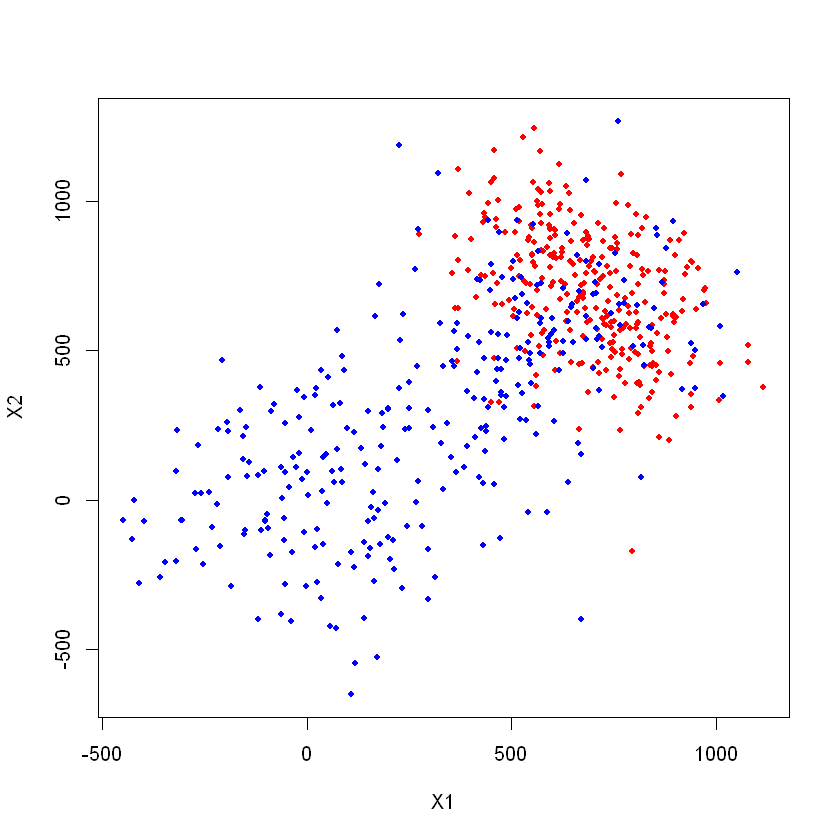

In [4]:
# Scatter Plot of Both the Data Set

mycolor = c("red","blue")
with(simdata,plot(X1,X2,col=mycolor[Y],pch = 20))

In [5]:
test1 = rnorm(400,mean = 0,sd = 1)
test2 = rnorm(400,mean = 0,sd = 1)
testdata1 = matrix(c(test1),2,200)
testdata2 = matrix(c(test2),2,200)
data_test1 = t(testdata1)%*%sigma1
data_test2 = t(testdata2)%*%sigma2
testdata_r = data_test1 + mu1
testdata_b = data_test2 + mu2

In [6]:
#Creating test data
testDF = data.frame(X1 = testdata_r[,1], X2 = testdata_r[,2], Y = rep('red', 200))
testDF = rbind(testDF, data.frame(X1 = testdata_b[,1], X2 = testdata_b[,2] , Y = rep('blue', 200)))

In [8]:
newX1 = seq(mX1<-floor(min(as.numeric(testDF$X1))),MX1<-ceiling(max(as.numeric(testDF$X1))),length.out = 200)
newX2 = seq(mX2<-floor(min(as.numeric(testDF$X2))),MX2<-ceiling(max(as.numeric(testDF$X2))),length.out = 200)
newPts0 = data.frame(X1=kronecker(newX1, rep(1,length(newX2))), X2=rep(newX2,length(newX1)))

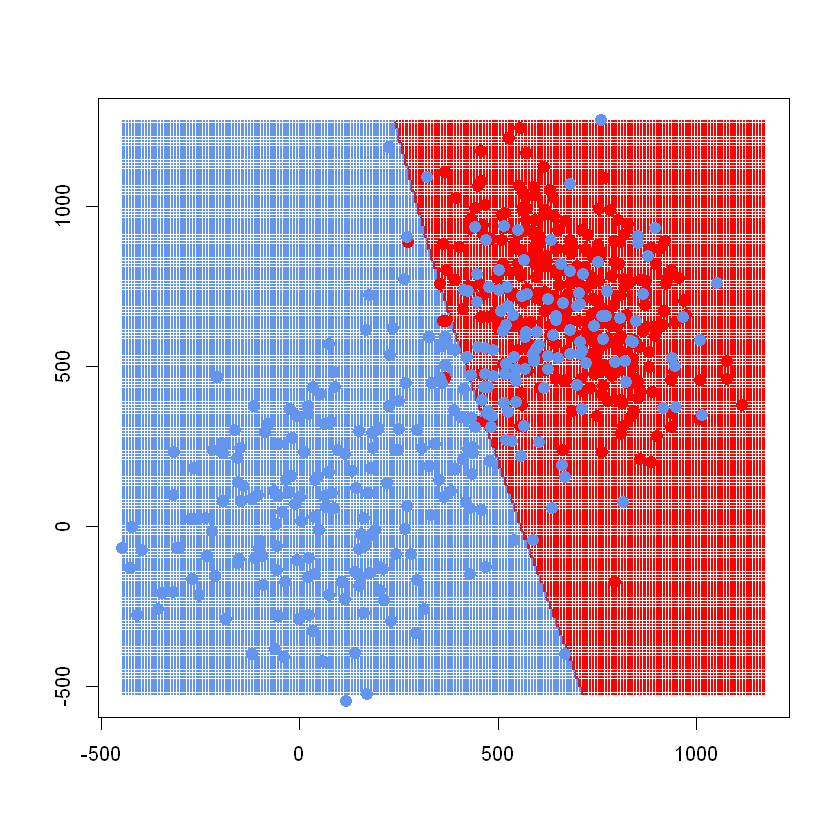

In [12]:
# Bayes decision rule
#  Using Bayes decision rule predicted the value of the last(color column) column test data and compare it to their actual value

red_det = det(sigma1)
blue_det = det(sigma2)
temp = matrix(ncol = 2, nrow = 0)

for(x in c(1:40000)){
  data_bayes = t(c(newPts0[x,1], newPts0[x,2]))
  red_prob = log(1/(red_det*2*pi)) + (-1/2 * (data_bayes - mu1) %*% solve(sigma1) %*% t(data_bayes - mu1))
  blue_prob = log(1/(blue_det*2*pi)) + (-1/2 * (data_bayes - mu2) %*% solve(sigma2) %*% t(data_bayes-mu2))
  if(red_prob > blue_prob)
  {
    newPts0[x,3] = "red"
    temp = rbind(temp, c( 1,0))
  }
  else
  {
    newPts0[x,3] = "blue"
    temp = rbind(temp, c(0, 1))
  }
}


# Bayes Desicion Boundary Plot 

z=matrix(temp,nrow=length(newX1),ncol = length(newX2),byrow = T)
contour(newX1,newX2,z,levels=c(0.5),col="maroon",drawlabels=FALSE,lwd=2)

points(newPts0[newPts0$V3 =='red',"X1"],newPts0[newPts0$V3=='red',"X2"],pch='.',cex=2,col="red")
points(newPts0[newPts0$V3 =='blue',"X1"],newPts0[newPts0$V3=='blue',"X2"],pch='.',cex=2,col="cornflowerblue")
points(simdata[simdata$Y =='red',"X1"],simdata[simdata$Y=='red',"X2"],pch=20,cex=2,col="red")
points(simdata[simdata$Y =='blue',"X1"],simdata[simdata$Y=='blue',"X2"],pch=20,cex=2,col="cornflowerblue")

In [13]:
# Test Error rate of Bayes Desicion Rule

testDF$P = NA

for (i in c(1:400)) {
  Actual = t(c(testDF[i,1], testDF[i,2]))
  red_prob = log(1/(red_det*2*pi)) + (-1/2 * (Actual - mu1) %*% solve(sigma1) %*% t(Actual - mu1))
  blue_prob = log(1/(blue_det*2*pi)) + (-1/2 * (Actual - mu2) %*% solve(sigma2) %*% t(Actual - mu2))
  if (red_prob>blue_prob)
  {
    testDF[i,4] = "red"
  }
  else
    testDF[i,4] = "blue"
}

table_1 = table(testDF$P,testDF$Y)
print(table_1)
paste("Error rate:  ",(table_1[1,2]+table_1[2,1])/sum(table_1))

      
       red blue
  blue   0  126
  red  200   74


[1] "Error rate:   0.815"

In [14]:
# KNeighborsClassifier and Test error Rate

library('kknn')

cv1=train.kknn(Y~X1+X2, ks=seq(1,600,by=10),data=simdata, kernel="rectangular")
summary(cv1)
k=cv1$best.parameters[[2]]
knnModel_1 = kknn(Y ~ X1 + X2, k=k,train=simdata,test=testDF,kernel="rectangular")
knnPred_1 = predict(knnModel_1, data=testDF)

table_2= table(testDF$Y, predict(knnModel_1))
print(table_2)
print(paste("Error rate:  ", (table_2[1,2]+table_2[2,1])/sum(table_2)))


Call:
train.kknn(formula = Y ~ X1 + X2, data = simdata, ks = seq(1,     600, by = 10), kernel = "rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1633333
Best kernel: rectangular
Best k: 41
      
       red blue
  red  191    9
  blue  57  143
[1] "Error rate:   0.165"


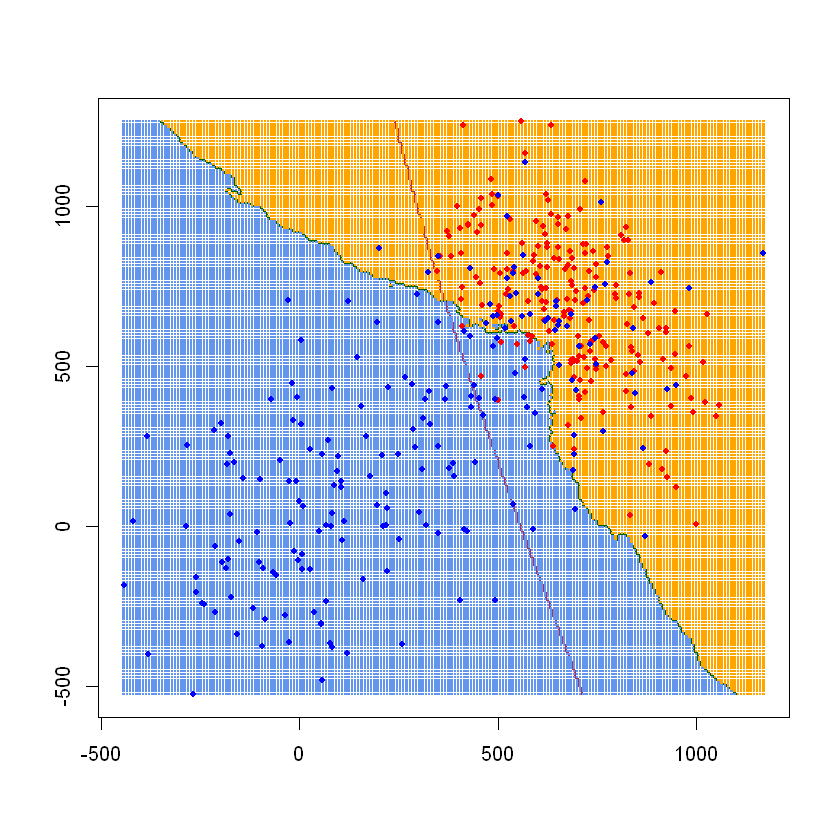

In [15]:
#  The scatter plot of the test data (KNeighborsClassifier) on the bayes desicion boundary plot 
# Bayes Desicion Boundary is in Maroon color and Knn Desicion Boundary is in Dark Green color

knnModel_2 = kknn(Y ~ X1 + X2, k=k,train=simdata,test=newPts0,kernel="rectangular")
knnPred_2 = predict(knnModel_2, data = newPts0)
newPts0 = cbind(newPts0,data.frame(Z = knnPred_2))


d = matrix(knnModel_2$prob,nrow=length(newX1),ncol = length(newX2),byrow = T)



contour(newX1,newX2,z,levels=c(0.5),col="maroon",drawlabels=FALSE,lwd=2)
contour(newX1,newX2,d,levels=c(0.5),col="darkgreen",add = TRUE, drawlabels=FALSE,lwd=2)

points(newPts0[newPts0$Z=='blue',"X1"],newPts0[newPts0$Z=='blue',"X2"],pch='.',cex=2,col="cornflowerblue")
points(newPts0[newPts0$Z=='red',"X1"],newPts0[newPts0$Z=='red',"X2"],pch='.',cex=2,col="orange")
points(testDF[testDF$Y=="red","X1"],testDF[testDF$Y=="red", "X2"], col="red",pch=20)
points(testDF[testDF$Y=="blue","X1"],testDF[testDF$Y=="blue", "X2"], col="blue",pch=20)